Consider the following Python dictionary `data` and Python list `labels`:

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```

**1.** Create a DataFrame `df` from this dictionary `data` which has the index `labels`.

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

In [3]:
df=pd.DataFrame(data,index=labels)
print(df)

  animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
c  snake  0.5       2       no
d    dog  NaN       3      yes
e    dog  5.0       2       no
f    cat  2.0       3       no
g  snake  4.5       1       no
h    cat  NaN       1      yes
i    dog  7.0       2       no
j    dog  3.0       1       no


**2.** Display a summary of the basic information about this DataFrame and its data (*hint: there is a single method that can be called on the DataFrame*).

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, a to j
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   animal    10 non-null     object 
 1   age       8 non-null      float64
 2   visits    10 non-null     int64  
 3   priority  10 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 400.0+ bytes


**3.** Return the first 3 rows of the DataFrame `df`.

In [5]:
df.head(3)

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no


**4.** Display the 'animal' and 'age' columns from the DataFrame `df`

In [6]:
df[['animal','age']]


,animal,age
a,cat,2.5
b,cat,3.0
c,snake,0.5
d,dog,NaN
e,dog,5.0
f,cat,2.0
g,snake,4.5
h,cat,NaN
i,dog,7.0
j,dog,3.0


**5.** Display the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']'

In [7]:
selected_data = df.loc [['c','d','h'], ['animal', 'age']]
print(selected_data)

  animal  age
c  snake  0.5
d    dog  NaN
h    cat  NaN


**6.** Select only the rows where the number of visits is greater than 3.

In [8]:
visits=df[df['visits']>3]
visits

,animal,age,visits,priority


**7.** Select the rows where the age is missing, i.e. it is `NaN`.

In [9]:
df1=df[df['age'].isna()]
df1

,animal,age,visits,priority
d,dog,NaN,3,yes
h,cat,NaN,1,yes


**8.** Select the rows where the animal is a cat *and* the age is less than 3.

In [10]:
rows = df[(df['animal'] == 'cat') & (df['age'] < 3)]
rows

,animal,age,visits,priority
a,cat,2.5,1,yes
f,cat,2.0,3,no


**9.** Select the rows where the age is between 2 and 4 (inclusive)

In [11]:
rows1= df[(df['age'] >= 2) & (df['age'] <= 4)]
rows1

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
f,cat,2.0,3,no
j,dog,3.0,1,no


**10.** Change the age in row 'f' to 1.5.

In [12]:
df.loc['f', 'Age'] = 1.5
df

,animal,age,visits,priority,Age
a,cat,2.5,1,yes,NaN
b,cat,3.0,3,yes,NaN
c,snake,0.5,2,no,NaN
d,dog,NaN,3,yes,NaN
e,dog,5.0,2,no,NaN
f,cat,2.0,3,no,1.5
g,snake,4.5,1,no,NaN
h,cat,NaN,1,yes,NaN
i,dog,7.0,2,no,NaN
j,dog,3.0,1,no,NaN


**11.** Calculate the sum of all visits in `df` (i.e. the total number of visits).

In [13]:
total_visits = df['visits'].sum()
total_visits

19

**12.** Calculate the mean age for each different animal in `df`.

In [18]:
df.groupby('animal')['age'].mean()

animal
cat      2.5
dog      5.0
snake    2.5
Name: age, dtype: float64

**13.** Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.

In [25]:
new_row =pd.DataFrame({'animal': ['cow'], 'age':['5'], 'visits': ['1'], 'priority': ['yes']},index=['k'])
df=pd.concat([df,new_row])
df

,animal,age,visits,priority,Age
a,cat,2.5,1,yes,NaN
b,cat,3.0,3,yes,NaN
c,snake,0.5,2,no,NaN
d,dog,NaN,3,yes,NaN
e,dog,5.0,2,no,NaN
f,cat,2.0,3,no,1.5
g,snake,4.5,1,no,NaN
h,cat,NaN,1,yes,NaN
i,dog,7.0,2,no,NaN
j,dog,3.0,1,no,NaN


**14.** Count the number of each type of animal in `df`.

In [27]:
 df['animal'].value_counts()


animal
cat      4
dog      4
snake    2
Name: count, dtype: int64

**15.** Sort `df` first by the values in the 'age' in *decending* order, then by the value in the 'visits' column in *ascending* order (so row `i` should be first, and row `d` should be last).

In [43]:
df.sort_values(by='age', ascending=False, inplace=True)
df.sort_values(by='visits', ascending=True,inplace=True)
df

,animal,age,visits,priority
g,snake,4.5,1,no
j,dog,3.0,1,no
a,cat,2.5,1,yes
h,cat,NaN,1,yes
i,dog,7.0,2,no
e,dog,5.0,2,no
c,snake,0.5,2,no
b,cat,3.0,3,yes
f,cat,2.0,3,no
d,dog,NaN,3,yes


**16.** The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be `True` and 'no' should be `False`.

In [44]:
df['priority'] = df['priority'].map({'yes': True, 'no': False})
df

,animal,age,visits,priority
g,snake,4.5,1,False
j,dog,3.0,1,False
a,cat,2.5,1,True
h,cat,NaN,1,True
i,dog,7.0,2,False
e,dog,5.0,2,False
c,snake,0.5,2,False
b,cat,3.0,3,True
f,cat,2.0,3,False
d,dog,NaN,3,True


**17.** In the 'animal' column, change the 'snake' entries to 'python'.

In [46]:
df['animal'] = df['animal'].replace('snake', 'python')
df

,animal,age,visits,priority
g,python,4.5,1,False
j,dog,3.0,1,False
a,cat,2.5,1,True
h,cat,NaN,1,True
i,dog,7.0,2,False
e,dog,5.0,2,False
c,python,0.5,2,False
b,cat,3.0,3,True
f,cat,2.0,3,False
d,dog,NaN,3,True


**18.** Load the ny-flights dataset to Python

In [48]:
df1=pd.read_csv("/content/ny-flights.csv")
df1

,fl_date,unique_carrier,airline_id,tail_num,fl_num,origin,dest,dep_time,dep_delay,arr_time,arr_delay,cancelled,arr,dep
0,2014-01-01 00:00:00,AA,19805,N338AA,1,JFK,LAX,914.0,14.0,1238.0,13.0,0.0,2014-01-01 12:38:00,2014-01-01 09:14:00
1,2014-01-01 00:00:00,AA,19805,N335AA,3,JFK,LAX,1157.0,-3.0,1523.0,13.0,0.0,2014-01-01 15:23:00,2014-01-01 11:57:00
2,2014-01-01 00:00:00,AA,19805,N327AA,21,JFK,LAX,1902.0,2.0,2224.0,9.0,0.0,2014-01-01 22:24:00,2014-01-01 19:02:00
3,2014-01-01 00:00:00,AA,19805,N3EHAA,29,LGA,PBI,722.0,-8.0,1014.0,-26.0,0.0,2014-01-01 10:14:00,2014-01-01 07:22:00
4,2014-01-01 00:00:00,AA,19805,N319AA,117,JFK,LAX,1347.0,2.0,1706.0,1.0,0.0,2014-01-01 17:06:00,2014-01-01 13:47:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20812,2014-01-31 00:00:00,UA,19977,N54711,1253,ROC,ORD,801.0,-4.0,908.0,4.0,0.0,2014-01-31 09:08:00,2014-01-31 08:01:00
20813,2014-01-31 00:00:00,UA,19977,N77525,1429,LGA,CLE,1522.0,-10.0,1649.0,-31.0,0.0,2014-01-31 16:49:00,2014-01-31 15:22:00
20814,2014-01-31 00:00:00,UA,19977,N37293,1456,LGA,IAH,719.0,-6.0,1006.0,-20.0,0.0,2014-01-31 10:06:00,2014-01-31 07:19:00
20815,2014-01-31 00:00:00,UA,19977,N24729,1457,LGA,IAH,852.0,7.0,1156.0,-6.0,0.0,2014-01-31 11:56:00,2014-01-31 08:52:00


from matplotlib import pyplot as plt
df1['airline_id'].plot(kind='hist', bins=20, title='airline_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df1['fl_num'].plot(kind='hist', bins=20, title='fl_num')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df1['dep_time'].plot(kind='hist', bins=20, title='dep_time')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df1['dep_delay'].plot(kind='hist', bins=20, title='dep_delay')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df1.plot(kind='scatter', x='airline_id', y='fl_num', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df1.plot(kind='scatter', x='fl_num', y='dep_time', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df1.plot(kind='scatter', x='dep_time', y='dep_delay', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df1.plot(kind='scatter', x='dep_delay', y='arr_time', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['fl_date']
  ys = series['airline_id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df1.sort_values('fl_date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('fl_date')
_ = plt.ylabel('airline_id')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['fl_date']
  ys = series['fl_num']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df1.sort_values('fl_date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('fl_date')
_ = plt.ylabel('fl_num')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['fl_date']
  ys = series['dep_delay']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df1.sort_values('fl_date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('fl_date')
_ = plt.ylabel('dep_delay')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['fl_date']
  ys = series['arr_delay']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df1.sort_values('fl_date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('fl_date')
_ = plt.ylabel('arr_delay')

from matplotlib import pyplot as plt
df1['airline_id'].plot(kind='line', figsize=(8, 4), title='airline_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df1['fl_num'].plot(kind='line', figsize=(8, 4), title='fl_num')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df1['dep_time'].plot(kind='line', figsize=(8, 4), title='dep_time')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df1['dep_delay'].plot(kind='line', figsize=(8, 4), title='dep_delay')
plt.gca().spines[['top', 'right']].set_visible(False)

**19.** Which airline ID is present maximum times in the dataset

In [54]:
airline_id_counts = df1['airline_id'].value_counts()
most_frequent_airline_id = airline_id_counts.idxmax()
max_count = airline_id_counts.max()
max_count

4902

In [56]:
import matplotlib.pyplot as plt

**20.** Draw a plot between dep_delay and arr_delay

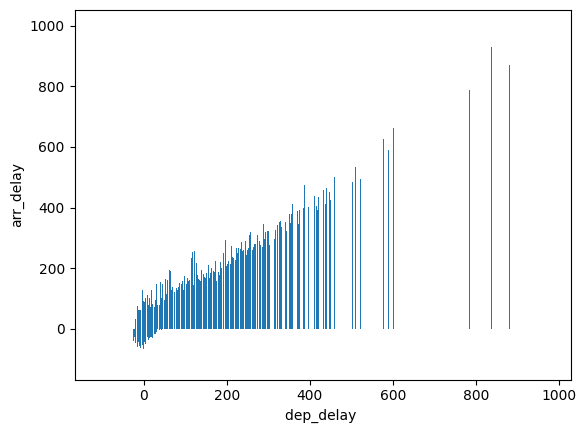

In [62]:
plt.bar(df1['dep_delay'],df1['arr_delay'])
plt.xlabel('dep_delay ')
plt.ylabel('arr_delay')
plt.show()

# **Diabetes Dataset EDA**

In [64]:
df2=pd.read_csv("/content/diabetes_model.csv")
df2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,5,77,82,41,42,35.8,0.156,35,0
1,9,122,56,0,0,33.3,1.114,33,1
2,0,113,76,0,0,33.3,0.278,23,1
3,1,139,62,41,480,40.7,0.536,21,0
4,10,161,68,23,132,25.5,0.326,47,1
...,...,...,...,...,...,...,...,...,...
609,4,114,64,0,0,28.9,0.126,24,0
610,2,175,88,0,0,22.9,0.326,22,0
611,3,121,52,0,0,36.0,0.127,25,1
612,7,136,74,26,135,26.0,0.647,51,0


In [65]:
import seaborn as sns

Text(0.5, 1.0, 'Histogram of Pregnancies')

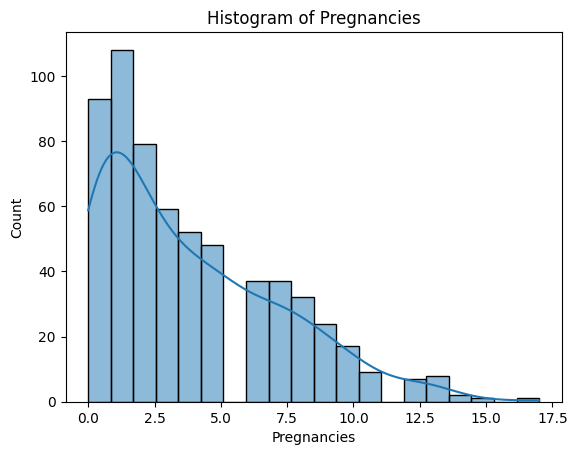

In [67]:
sns.histplot(df2['Pregnancies'],bins=20,kde=True)
plt.title('Histogram of Pregnancies')

Text(0.5, 1.0, 'Histogram of Glucose')

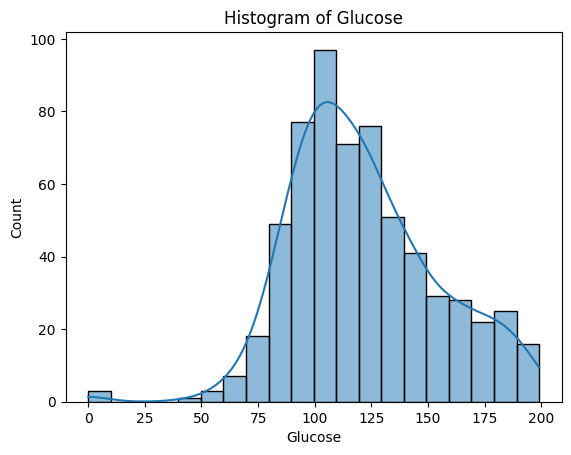

In [68]:
sns.histplot(df2['Glucose'],bins=20,kde=True)
plt.title('Histogram of Glucose')

Text(0.5, 1.0, 'Histogram of BloodPressure')

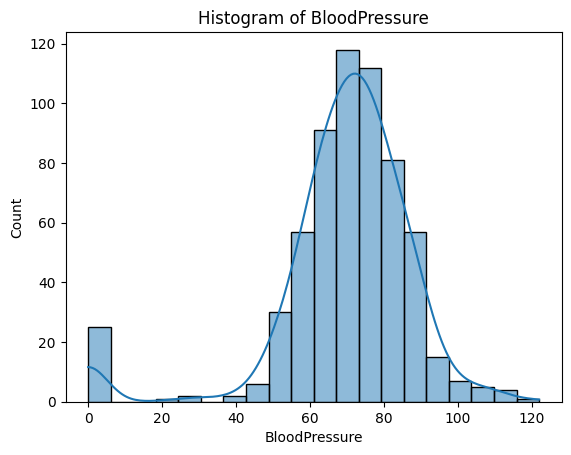

In [69]:
sns.histplot(df2['BloodPressure'],bins=20,kde=True)
plt.title('Histogram of BloodPressure')

Text(0.5, 1.0, 'Histogram of SkinThickness')

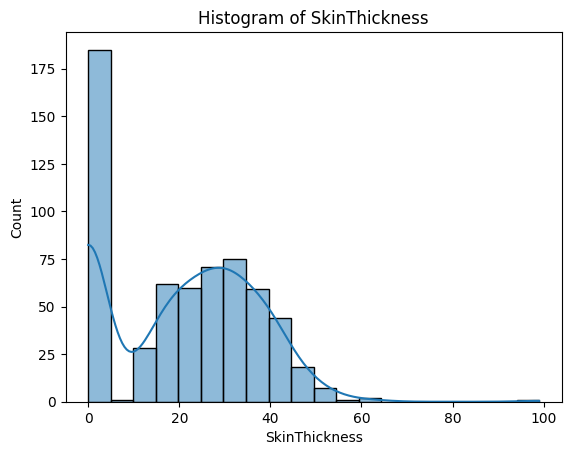

In [70]:
sns.histplot(df2['SkinThickness'],bins=20,kde=True)
plt.title('Histogram of SkinThickness')

Text(0.5, 1.0, 'Histogram of Insulin')

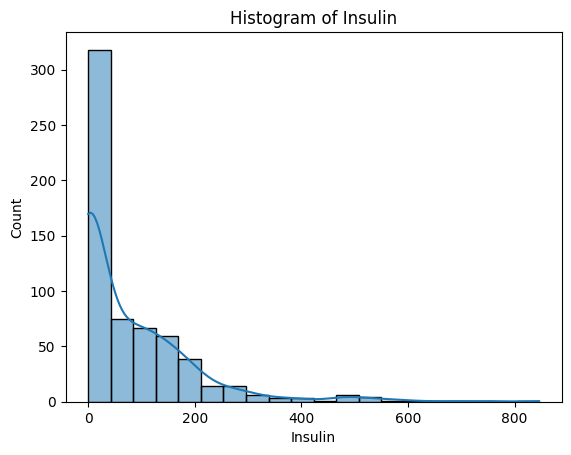

In [71]:
sns.histplot(df2['Insulin'],bins=20,kde=True)
plt.title('Histogram of Insulin')

Text(0.5, 1.0, 'Histogram of BMI')

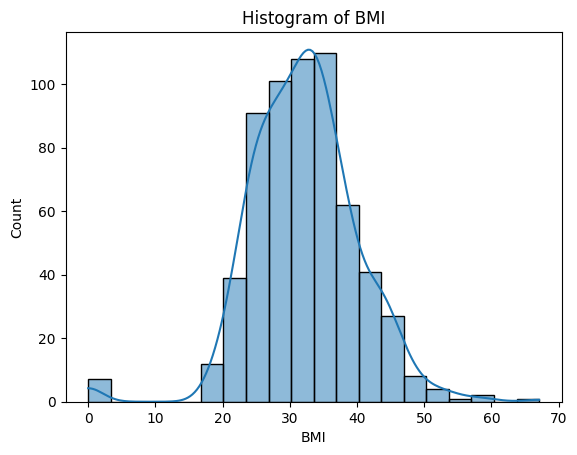

In [72]:
sns.histplot(df2['BMI'],bins=20,kde=True)
plt.title('Histogram of BMI')

Text(0.5, 1.0, 'Histogram of DiabetesPedigreeFunction')

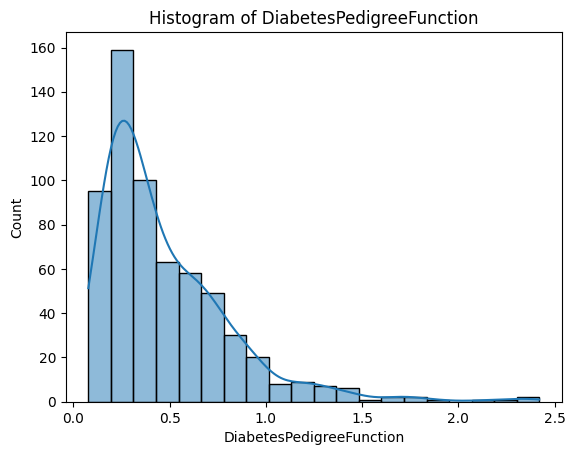

In [73]:
sns.histplot(df2['DiabetesPedigreeFunction'],bins=20,kde=True)
plt.title('Histogram of DiabetesPedigreeFunction')

Text(0.5, 1.0, 'Histogram of Age')

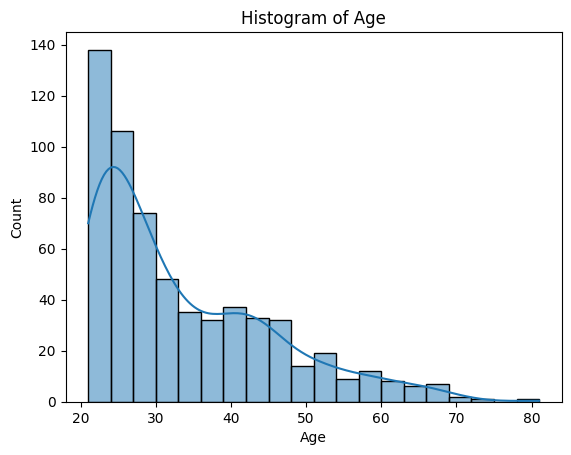

In [74]:
sns.histplot(df2['Age'],bins=20,kde=True)
plt.title('Histogram of Age')

Text(0.5, 1.0, 'Histogram of Outcome')

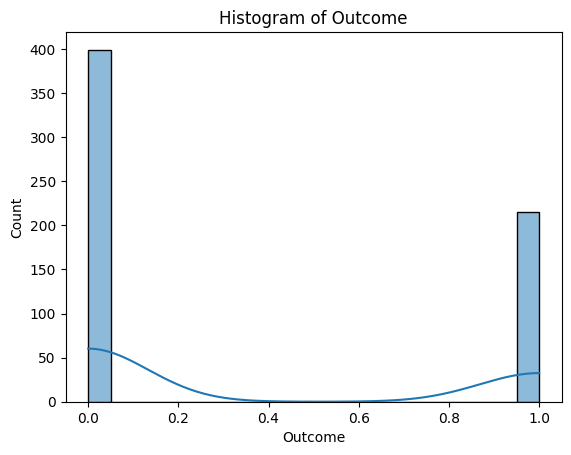

In [75]:
sns.histplot(df2['Outcome'],bins=20,kde=True)
plt.title('Histogram of Outcome')

(array([1]), [Text(1, 0, '1')])

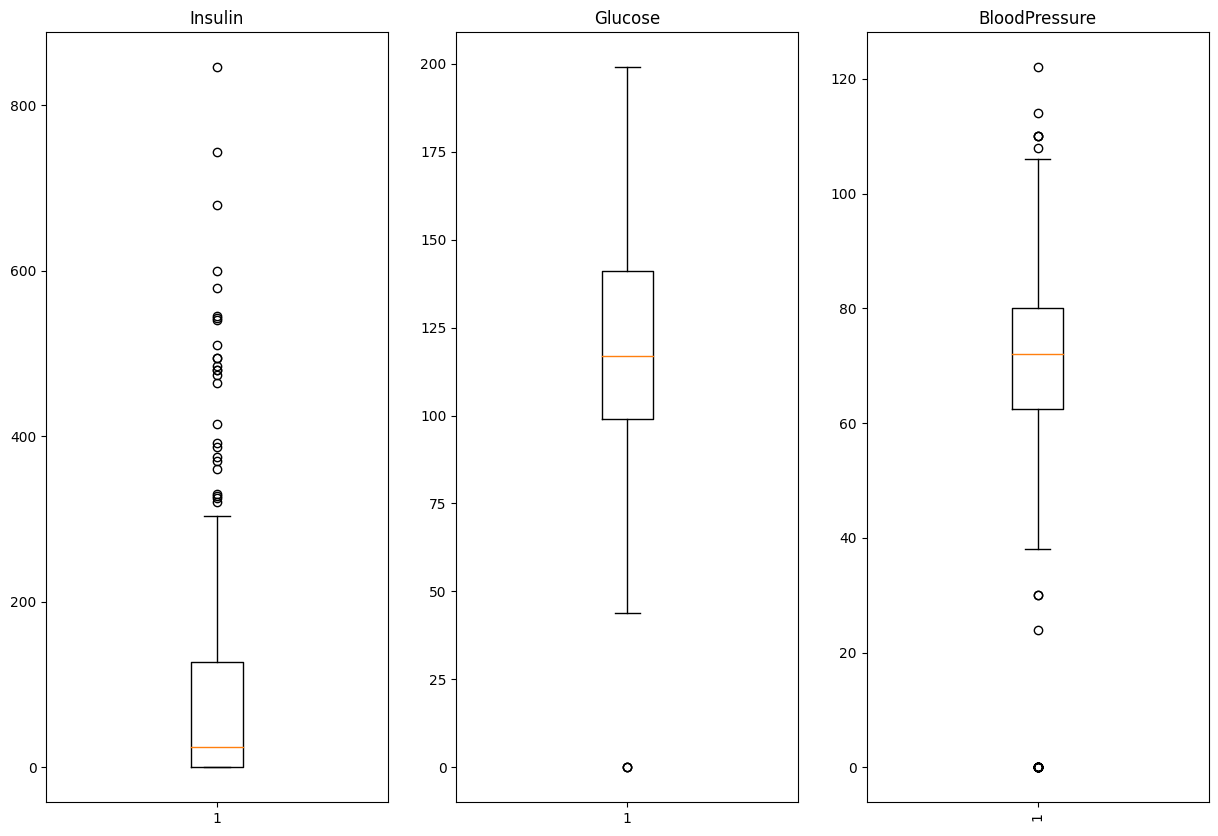

In [86]:
fig,ax=plt.subplots(1,3,figsize=(15,10))
ax[0].boxplot(df2['Insulin'])
ax[0].set_title("Insulin")
plt.xticks(rotation=90)
ax[1].boxplot(df2['Glucose'])
ax[1].set_title("Glucose")
plt.xticks(rotation=90)
ax[2].boxplot(df2['BloodPressure'])
ax[2].set_title("BloodPressure")
plt.xticks(rotation=90)

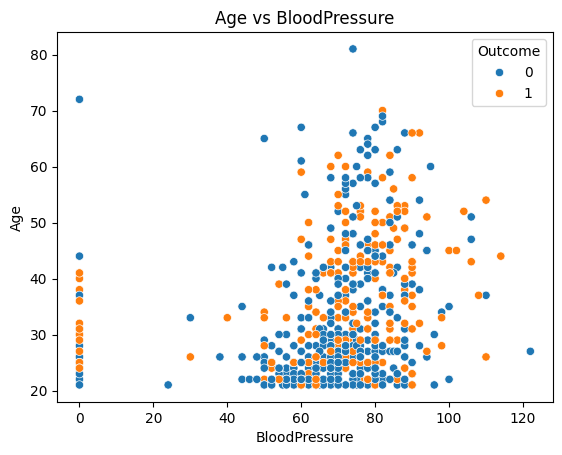

In [88]:
sns.scatterplot(x='BloodPressure',y='Age',hue='Outcome',data=df2)
plt.title("Age vs BloodPressure")
plt.ylabel('Age')
plt.xlabel('BloodPressure')
plt.show()

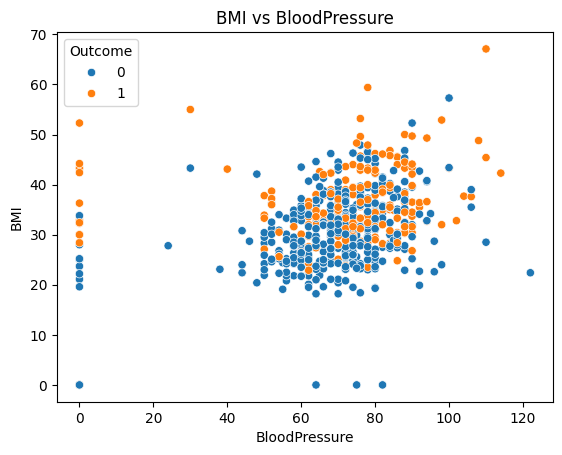

In [89]:
sns.scatterplot(x='BloodPressure',y='BMI',hue='Outcome',data=df2)
plt.title("BMI vs BloodPressure")
plt.ylabel('BMI')
plt.xlabel('BloodPressure')
plt.show()

In [91]:
num=df2.select_dtypes(include=['int64','float64'])
num.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,5,77,82,41,42,35.8,0.156,35,0
1,9,122,56,0,0,33.3,1.114,33,1
2,0,113,76,0,0,33.3,0.278,23,1
3,1,139,62,41,480,40.7,0.536,21,0
4,10,161,68,23,132,25.5,0.326,47,1


In [93]:
corr_matrix = num.corr()
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.137245,0.165089,-0.101968,-0.083955,-0.005699,-0.039171,0.552744,0.201069
Glucose,0.137245,1.000000,0.151446,0.073133,0.320291,0.237282,0.134167,0.251873,0.478688
BloodPressure,0.165089,0.151446,1.000000,0.209564,0.083704,0.283813,0.025739,0.227663,0.056902
SkinThickness,-0.101968,0.073133,0.209564,1.000000,0.433628,0.379994,0.180571,-0.111832,0.086276
Insulin,-0.083955,0.320291,0.083704,0.433628,1.000000,0.190669,0.173699,-0.037037,0.133967
BMI,-0.005699,0.237282,0.283813,0.379994,0.190669,1.000000,0.124730,0.037500,0.316448
DiabetesPedigreeFunction,-0.039171,0.134167,0.025739,0.180571,0.173699,0.124730,1.000000,0.045008,0.164681
Age,0.552744,0.251873,0.227663,-0.111832,-0.037037,0.037500,0.045008,1.000000,0.221598
Outcome,0.201069,0.478688,0.056902,0.086276,0.133967,0.316448,0.164681,0.221598,1.000000


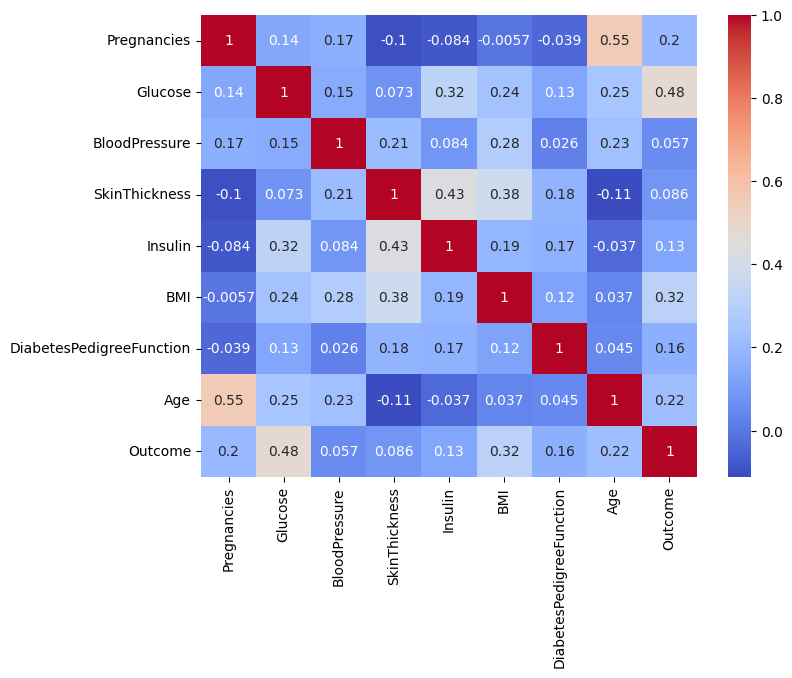

In [95]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.show()

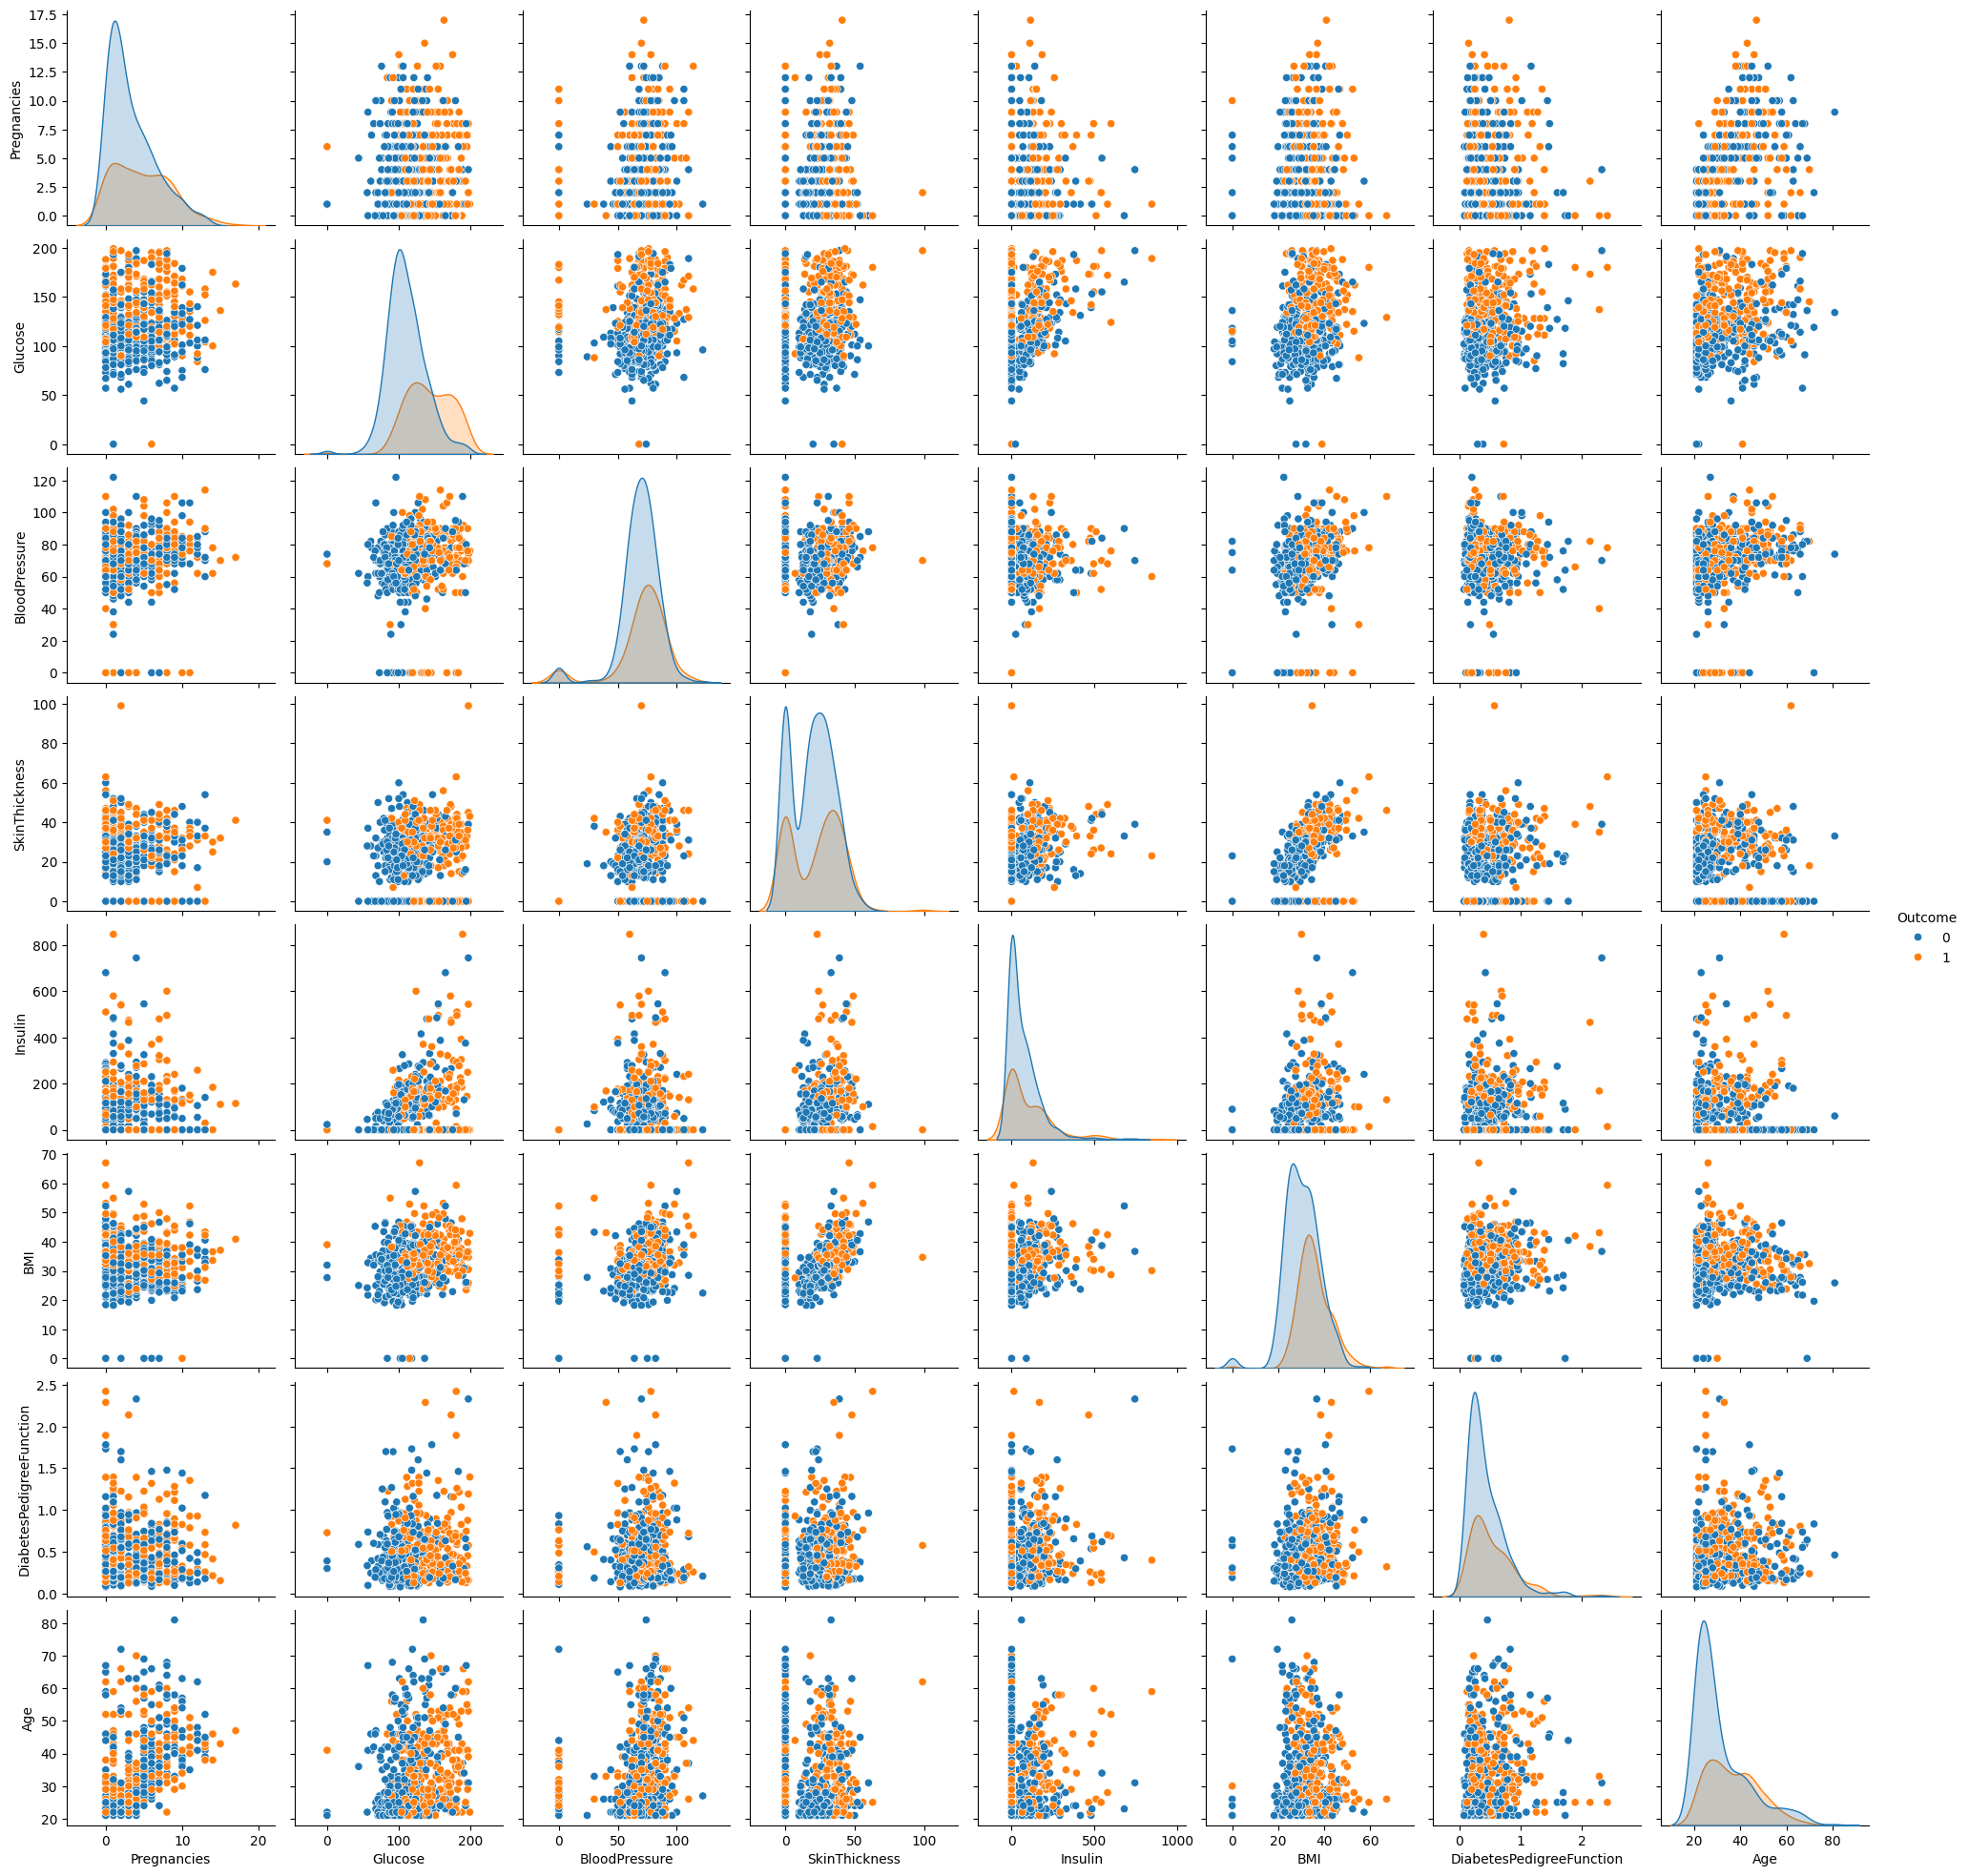

In [96]:
sns.pairplot(df2,hue='Outcome')
plt.show()